## Data and Importation

In [1]:
# Package importation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from backtesting import Backtest, Strategy
import seaborn as sns 
import plotly.graph_objects as go 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Data importation
df = pd.read_csv("BTC_USD_5Y_31_01_2024.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df = df[df['Volume']!=0]
df = df.drop(columns="Adj Close")
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2024-01-26,39936.816406,42209.386719,39825.691406,41816.871094,25598119893
2024-01-27,41815.625000,42195.632813,41431.281250,42120.054688,11422941934
2024-01-28,42126.125000,42797.175781,41696.910156,42035.593750,16858971687
2024-01-29,42030.914063,43305.867188,41818.332031,43288.246094,20668476578
2024-01-30,43300.226563,43796.179688,43172.929688,43494.015625,24570679296


## Indicator and Signal Calculation

In [3]:
# Bollinger band calculation
def bollinger_bands(df, period = 20, std_factor = 2):
    rolling_mean = df['Close'].rolling(period).mean()
    rolling_std = df['Close'].rolling(period).std()
    df['upper_band'] = rolling_mean + rolling_std * std_factor
    df['lower_band'] = rolling_mean - rolling_std * std_factor
    return df['upper_band'], df['lower_band']

upper_band, lower_band = bollinger_bands(df)

In [4]:
# Trend classification
def trend_classify(df):
    df['trend'] = 0
    # Uptrend = 1
    df['trend'][df['Close'] > df['upper_band']] = 1
    # Downtrend = -1
    df['trend'][df['Close'] < df['lower_band']] = -1
    return df

trend_classify(df)[500:510]

,Open,High,Low,Close,Volume,upper_band,lower_band,trend
Date,,,,,,,,
2020-06-13,9480.735352,9493.211914,9396.009766,9475.277344,17564322315,10182.629224,8917.073902,0
2020-06-14,9477.553711,9482.270508,9347.593750,9386.788086,18991732746,10136.482837,9011.205639,0
2020-06-15,9386.035156,9504.860352,8990.175781,9450.702148,26699704768,10052.797329,9156.456090,0
2020-06-16,9454.266602,9579.430664,9400.445313,9538.024414,21565537209,10025.802379,9219.151723,0
2020-06-17,9533.784180,9540.422852,9327.339844,9480.254883,20177709879,10026.328098,9214.076394,0
2020-06-18,9481.567383,9482.782227,9328.395508,9411.840820,17770083003,10027.699002,9209.977170,0
2020-06-19,9410.293945,9440.875977,9274.295898,9288.018555,19632223107,10030.672226,9165.764395,0
2020-06-20,9290.959961,9394.971680,9247.379883,9332.340820,17130541557,10036.488709,9147.076135,0
2020-06-21,9330.926758,9401.107422,9300.430664,9303.629883,15324301169,9919.639285,9177.561691,0


In [5]:
# Stochastics calculation
def stoch(df, period=14, k_smooth=3, d_smooth=3):
    close = df['Close']
    high = df['High']
    low = df['Low']

    # Stochastic K
    df['stoch_k'] = ((100*(close - low.rolling(period).min())/
                      (high.rolling(period).max() - low.rolling(period).min()))
                      .rolling(k_smooth).mean())
    # Stochastic D
    df['stoch_d'] = df['stoch_k'].rolling(d_smooth).mean()
    return df['stoch_k'], df['stoch_d']

stoch(df)
df[500:510]

,Open,High,Low,Close,Volume,upper_band,lower_band,trend,stoch_k,stoch_d
Date,,,,,,,,,,
2020-06-13,9480.735352,9493.211914,9396.009766,9475.277344,17564322315,10182.629224,8917.073902,0,17.394425,32.856398
2020-06-14,9477.553711,9482.270508,9347.593750,9386.788086,18991732746,10136.482837,9011.205639,0,19.708257,23.276274
2020-06-15,9386.035156,9504.860352,8990.175781,9450.702148,26699704768,10052.797329,9156.456090,0,24.833338,20.645340
2020-06-16,9454.266602,9579.430664,9400.445313,9538.024414,21565537209,10025.802379,9219.151723,0,36.540909,27.027501
2020-06-17,9533.784180,9540.422852,9327.339844,9480.254883,20177709879,10026.328098,9214.076394,0,49.367122,36.913789
2020-06-18,9481.567383,9482.782227,9328.395508,9411.840820,17770083003,10027.699002,9209.977170,0,51.315220,45.741084
2020-06-19,9410.293945,9440.875977,9274.295898,9288.018555,19632223107,10030.672226,9165.764395,0,42.525710,47.736017
2020-06-20,9290.959961,9394.971680,9247.379883,9332.340820,17130541557,10036.488709,9147.076135,0,37.325463,43.722131
2020-06-21,9330.926758,9401.107422,9300.430664,9303.629883,15324301169,9919.639285,9177.561691,0,33.521067,37.790747


In [6]:
# https://www.investopedia.com/terms/a/atr.asp
def atr(df, period=14): # Default period is 14
    df['H-L'] = df['High'] - df['Low']
    df['H-PC'] = abs((df['High'] - df['Close'].shift(1)))
    df['L-PC'] = abs((df['Low'] - df['Close'].shift(1)))
    df['atr'] = df[['H-L','H-PC','L-PC']].max(axis=1)
    return df['atr'].rolling(window=period).mean()

atr(df,14)

Date
2019-01-30            NaN
2019-01-31            NaN
2019-02-01            NaN
2019-02-02            NaN
2019-02-03            NaN
                 ...     
2024-01-26    1353.715681
2024-01-27    1353.275391
2024-01-28    1336.081194
2024-01-29    1327.026228
2024-01-30    1265.809989
Name: atr, Length: 1827, dtype: float64

In [7]:
# Signal generation
def signal_generation(df):
    """
    Idea 1:
    Buy when uptrend (trend = 1)
    Sell when downtrend (trend = -1)

    Idea 2:
    Buy when uptrend (trend = 1) and stoch_k above stoch_d
    Sell when downtrend (trend = -1) and stoch_k below stoch_d
    
    I will check the Idea 1 first
    """
    df['signal'] = 0
    buy_signal = (df['trend'] == 1) # & (df['stoch_k'] > df['stoch_d'])
    df.loc[buy_signal, 'signal'] = 1
    sell_signal = (df['trend'] == -1) # & (df['stoch_k'] < df['stoch_d'])
    df.loc[sell_signal, 'signal'] = -1

    return df

signal_generation(df)
df[500:510]

,Open,High,Low,Close,Volume,upper_band,lower_band,trend,stoch_k,stoch_d,H-L,H-PC,L-PC,atr,signal
Date,,,,,,,,,,,,,,,
2020-06-13,9480.735352,9493.211914,9396.009766,9475.277344,17564322315,10182.629224,8917.073902,0,17.394425,32.856398,97.202148,12.368164,84.833984,97.202148,0
2020-06-14,9477.553711,9482.270508,9347.593750,9386.788086,18991732746,10136.482837,9011.205639,0,19.708257,23.276274,134.676758,6.993164,127.683594,134.676758,0
2020-06-15,9386.035156,9504.860352,8990.175781,9450.702148,26699704768,10052.797329,9156.456090,0,24.833338,20.645340,514.684571,118.072266,396.612305,514.684571,0
2020-06-16,9454.266602,9579.430664,9400.445313,9538.024414,21565537209,10025.802379,9219.151723,0,36.540909,27.027501,178.985351,128.728516,50.256835,178.985351,0
2020-06-17,9533.784180,9540.422852,9327.339844,9480.254883,20177709879,10026.328098,9214.076394,0,49.367122,36.913789,213.083008,2.398438,210.684570,213.083008,0
2020-06-18,9481.567383,9482.782227,9328.395508,9411.840820,17770083003,10027.699002,9209.977170,0,51.315220,45.741084,154.386719,2.527344,151.859375,154.386719,0
2020-06-19,9410.293945,9440.875977,9274.295898,9288.018555,19632223107,10030.672226,9165.764395,0,42.525710,47.736017,166.580079,29.035157,137.544922,166.580079,0
2020-06-20,9290.959961,9394.971680,9247.379883,9332.340820,17130541557,10036.488709,9147.076135,0,37.325463,43.722131,147.591797,106.953125,40.638672,147.591797,0
2020-06-21,9330.926758,9401.107422,9300.430664,9303.629883,15324301169,9919.639285,9177.561691,0,33.521067,37.790747,100.676758,68.766602,31.910156,100.676758,0


In [8]:
# Add signal point to plot
def add_signal_point(df):
    df['signal_point'] = np.nan
    df.loc[df['signal'] == 1, 'signal_point'] = df['High']*1.05
    df.loc[df['signal'] == -1, 'signal_point'] = df['Low']*0.95
    return df

add_signal_point(df)
df[500:510]

,Open,High,Low,Close,Volume,upper_band,lower_band,trend,stoch_k,stoch_d,H-L,H-PC,L-PC,atr,signal,signal_point
Date,,,,,,,,,,,,,,,,
2020-06-13,9480.735352,9493.211914,9396.009766,9475.277344,17564322315,10182.629224,8917.073902,0,17.394425,32.856398,97.202148,12.368164,84.833984,97.202148,0,NaN
2020-06-14,9477.553711,9482.270508,9347.593750,9386.788086,18991732746,10136.482837,9011.205639,0,19.708257,23.276274,134.676758,6.993164,127.683594,134.676758,0,NaN
2020-06-15,9386.035156,9504.860352,8990.175781,9450.702148,26699704768,10052.797329,9156.456090,0,24.833338,20.645340,514.684571,118.072266,396.612305,514.684571,0,NaN
2020-06-16,9454.266602,9579.430664,9400.445313,9538.024414,21565537209,10025.802379,9219.151723,0,36.540909,27.027501,178.985351,128.728516,50.256835,178.985351,0,NaN
2020-06-17,9533.784180,9540.422852,9327.339844,9480.254883,20177709879,10026.328098,9214.076394,0,49.367122,36.913789,213.083008,2.398438,210.684570,213.083008,0,NaN
2020-06-18,9481.567383,9482.782227,9328.395508,9411.840820,17770083003,10027.699002,9209.977170,0,51.315220,45.741084,154.386719,2.527344,151.859375,154.386719,0,NaN
2020-06-19,9410.293945,9440.875977,9274.295898,9288.018555,19632223107,10030.672226,9165.764395,0,42.525710,47.736017,166.580079,29.035157,137.544922,166.580079,0,NaN
2020-06-20,9290.959961,9394.971680,9247.379883,9332.340820,17130541557,10036.488709,9147.076135,0,37.325463,43.722131,147.591797,106.953125,40.638672,147.591797,0,NaN
2020-06-21,9330.926758,9401.107422,9300.430664,9303.629883,15324301169,9919.639285,9177.561691,0,33.521067,37.790747,100.676758,68.766602,31.910156,100.676758,0,NaN


In [9]:
# Plotting signal on the chart
fig = go.Figure(data=[go.Candlestick(x = df.index,
                                     open = df['Open'],
                                     high = df['High'],
                                     low = df['Low'],
                                     close = df['Close']),
                     go.Scatter(x = df.index, y = df['upper_band'], line = dict(color = 'grey', width = 1), name = 'upper_band'),
                     go.Scatter(x = df.index, y = df['lower_band'], line = dict(color = 'grey', width = 1), name = 'lower_band'),
                     go.Scatter(x = df.index, y = df['signal_point'], mode = 'markers', marker = dict(size=3, color = 'black') ,name = 'signal_point')])

fig.show()


## Stratgy Backtesting

In [10]:
# Strategy definition
class BB_strategy(Strategy):
    bbands_periord = 20
    bbands_std = 1
    # stoch_period = 14
    # stoch_k_smooth = 3
    # stoch_d_smooth = 3
    
    def init(self):
        super().init()
        # Add indicators
        self.upper_band, self.lower_band = self.I(bollinger_bands,self.data.df, self.bbands_periord, self.bbands_std)
        # For Idea 2
        # self.stoch_k, self.stoch_d = self.I(stoch, self.data.df, self.stoch_period, self.stoch_k_smooth, self.stoch_d_smooth)

    def next(self):
        super().next()
        # Trading logic
        # Check if we are in a position
        if self.position:
            # If yes, check if need to close it
            # If close crosses below the upper band, close the position
            if self.position.is_long and self.data['Close'][-1] < self.upper_band[-1] : #self.stoch_k[-1] < self.stoch_d[-1]:
                self.position.close()
            elif not self.position.is_long and self.data['Close'][-1] > self.lower_band[-1]: #self.stoch_k[-1] > self.stoch_d[-1]:
                self.position.close()
        
        else:
            # Otherwise, look for an entry signal
            # If stochastics K is above stochastics D and we are in an uptrend, buy
            if self.data['Close'][-1] >= self.upper_band[-1]:  # and (self.stoch_k[-1] > self.stoch_d[-1]):
                    self.buy()
            # If stochastics K is below stochastics D and we are in a downtrend, sell
            elif self.data['Close'][-1] < self.lower_band[-1]: # and (self.stoch_k[-1] < self.stoch_d[-1]):
                self.sell()


In [11]:
# First Backtest Run for idea 1
# Without commission and slippage
idea_1 = Backtest(df, BB_strategy, cash=100000, commission=0, trade_on_close=True)
stats_1 = idea_1.run()
stats_1

Start                     2019-01-30 00:00:00
End                       2024-01-30 00:00:00
Duration                   1826 days 00:00:00
Exposure Time [%]                   62.452107
Equity Final [$]                180523.460563
Equity Peak [$]                 473612.111909
Return [%]                          80.523461
Buy & Hold Return [%]              1147.61186
Return (Ann.) [%]                     12.5254
Volatility (Ann.) [%]               57.719032
Sharpe Ratio                         0.217006
Sortino Ratio                        0.413407
Calmar Ratio                         0.193888
Max. Drawdown [%]                  -64.601361
Avg. Drawdown [%]                  -13.623216
Max. Drawdown Duration     1073 days 00:00:00
Avg. Drawdown Duration       99 days 00:00:00
# Trades                                  201
Win Rate [%]                        26.865672
Best Trade [%]                      83.172049
Worst Trade [%]                    -15.250544
Avg. Trade [%]                    

In [12]:
# To see all the trades
idea_1.plot()

Row(id='1448', ...)

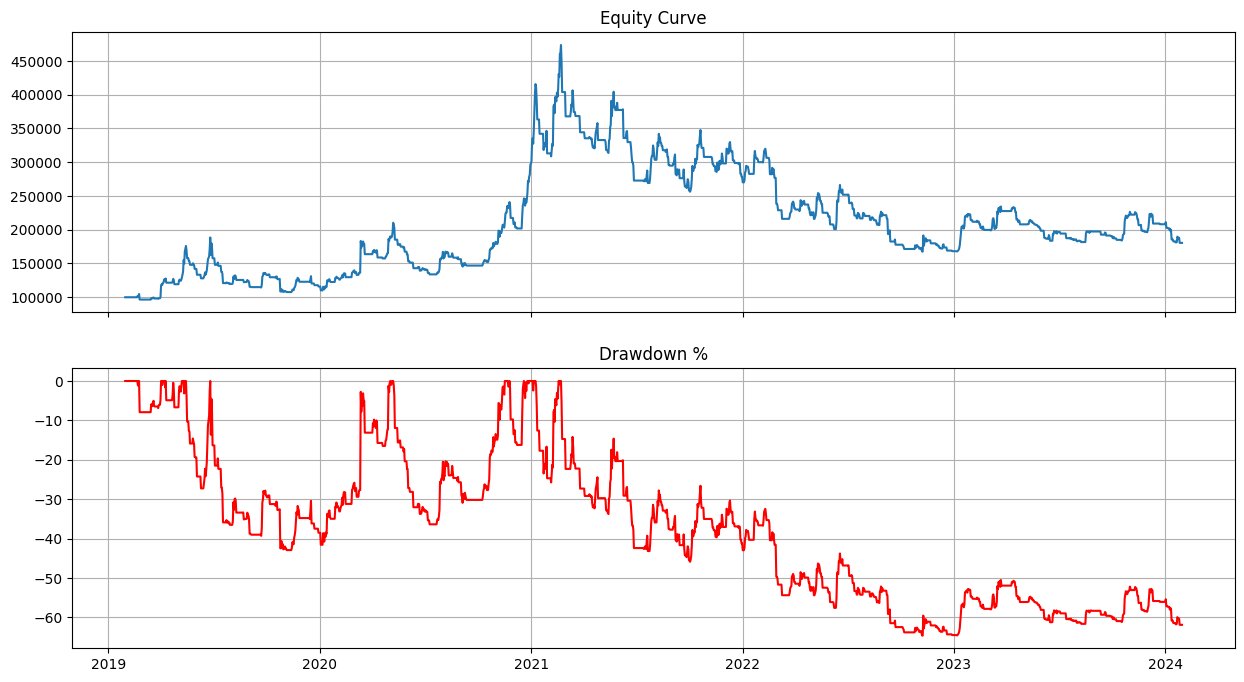

In [13]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15, 8))
ax1.plot(stats_1['_equity_curve']['Equity'])
ax1.set_title("Equity Curve")
ax1.grid(True)
# Change color of the second y axis into red
ax2.plot(-100*stats_1['_equity_curve']['DrawdownPct'], color = 'red')
ax2.set_title("Drawdown %")
ax2.grid(True)

plt.show()


## Strategy Optimization

In [14]:
# Optimization for idea 1
# Without commission and slippage
stats_op_1, heatmap_1 = idea_1.optimize(bbands_periord = range(10, 100, 5), bbands_std = [i/10 for i in range(0, 30, 5)],
                             maximize='Return [%]', random_state=0,
                             return_heatmap=True)

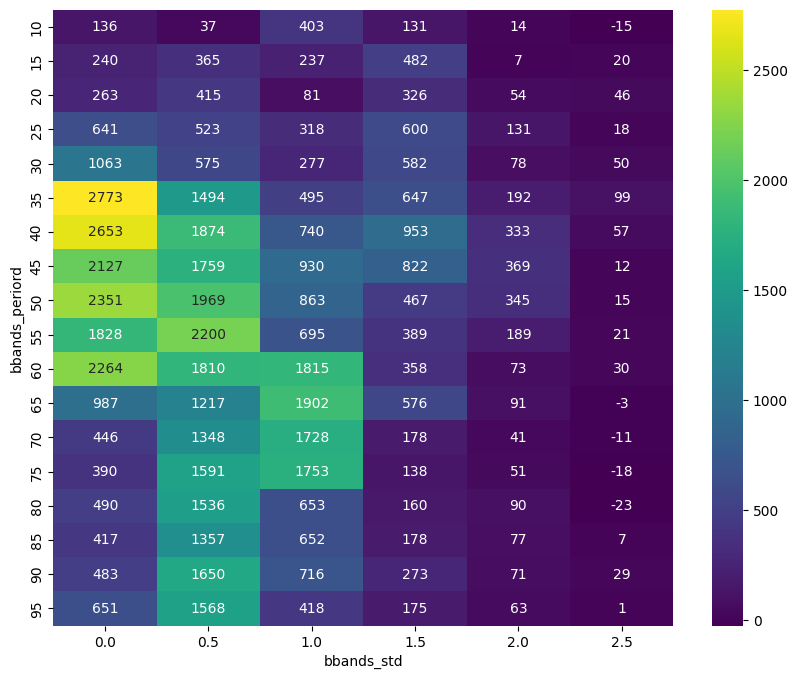

In [15]:
heatmap_1_df = heatmap_1.unstack()
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_1_df,annot=True, cmap='viridis', fmt='.0f')
plt.show()

## First Conclusion

Although the initial strategy did not surpass the buy and hold return of 1147%, there is promise in further optimizing the BBANDS parameters. The best results came from bbands_periods between 35-60 days and a standard deviation of 0. Focusing on a bbands_periods of 50 days could further improve returns compared to buy and hold

## Adding Stop loss and Take Profit

In [16]:
# Strategy definition
class BB_strategy_STLP(Strategy):
    bbands_periord = 50
    bbands_std = 0
    # Using ATR as stoploss. ATR is ATverage True Range
    
    # ATR factor
    atr_factor = 1
    # R:R Ratio
    rr_ratio = 1

    
    def init(self):
        super().init()
        # Add indicators
        self.upper_band, self.lower_band = self.I(bollinger_bands,self.data.df, self.bbands_periord, self.bbands_std)
             
    def next(self):
        super().next()
        stoploss = self.atr_factor * self.data.atr[-1]  # Stop Loss
        takeprofit = self.rr_ratio * stoploss# Take Profit
        
          # Trading logic
        # Check if we are in a position
        if self.position:
            # If yes, check if need to close it
            # If close crosses below the upper band, close the position

            if self.position.is_long and self.data['Close'][-1] < self.upper_band[-1]: 
                self.position.close()
            elif not self.position.is_long and self.data['Close'][-1] > self.lower_band[-1]: 
                self.position.close()
        
        else:
            # Otherwise, look for an entry signal
            # If we are in an uptrend, buy
            if self.data['Close'][-1] >= self.upper_band[-1]:
                sl1 = max(self.data.Close[-1] - stoploss,0)
                tp1 = max(self.data.Close[-1] + takeprofit,0)
                self.buy(sl=sl1, tp= tp1)
                # If we are in a downtrend, sell
            elif self.data['Close'][-1] < self.lower_band[-1]:
                sl1 = max(self.data.Close[-1] + stoploss,0)
                tp1 = max(self.data.Close[-1] - takeprofit,0)
                self.sell(sl=sl1, tp= tp1)

In [17]:
idea_1_SLTP = Backtest(df, BB_strategy_STLP, cash=100000, commission=0, trade_on_close=True)
stats_1_SLTP = idea_1_SLTP.run()
stats_1_SLTP

Start                     2019-01-30 00:00:00
End                       2024-01-30 00:00:00
Duration                   1826 days 00:00:00
Exposure Time [%]                   97.208539
Equity Final [$]                664739.605499
Equity Peak [$]                 737472.211015
Return [%]                         564.739605
Buy & Hold Return [%]              1147.61186
Return (Ann.) [%]                   45.999108
Volatility (Ann.) [%]               90.762536
Sharpe Ratio                         0.506807
Sortino Ratio                        1.144324
Calmar Ratio                         0.691911
Max. Drawdown [%]                  -66.481294
Avg. Drawdown [%]                   -7.735959
Max. Drawdown Duration      640 days 00:00:00
Avg. Drawdown Duration       40 days 00:00:00
# Trades                                  256
Win Rate [%]                        53.515625
Best Trade [%]                      22.418506
Worst Trade [%]                    -43.172553
Avg. Trade [%]                    

In [18]:
stats_1_SLTP, heatmap_1_SLTP = idea_1_SLTP.optimize(atr_factor = [i/10 for i in range(1,60,5)], 
                                                    rr_ratio = [i/10 for i in range(5, 300, 20)],
                                                    maximize='Return [%]', random_state=0,
                                                    return_heatmap=True)

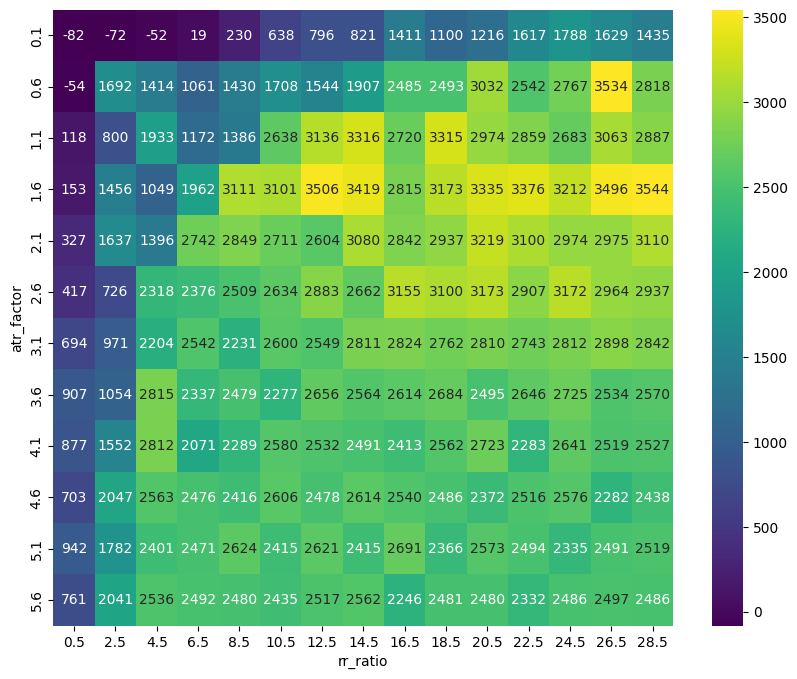

In [19]:
heatmap_1_SLTP_df = heatmap_1_SLTP.unstack()
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_1_SLTP_df,annot=True, cmap='viridis', fmt='.0f')
plt.show()

## Stop loss and Take profit Conclusion

We have an attractive and stable profit zone with atr_factor from 0.6 to 2.6, and rr_ratio from 14.5 to 28.5. Therefore, we will choose the middle level with atr_factor equal to 1.6 and rr_ratio equal to 22.5 to continue conducting the backtest further.

In [20]:
# Strategy definition
class BB_strategy_STLP_op(Strategy):
    bbands_periord = 50
    bbands_std = 0
    # Using ATR as stoploss. ATR is ATverage True Range
    
    # ATR factor
    atr_factor = 1.6
    # R:R Ratio
    rr_ratio = 22.5

    
    def init(self):
        super().init()
        # Add indicators
        self.upper_band, self.lower_band = self.I(bollinger_bands,self.data.df, self.bbands_periord, self.bbands_std)
             
    def next(self):
        super().next()
        stoploss = self.atr_factor * self.data.atr[-1]  # Stop Loss
        takeprofit = self.rr_ratio * stoploss# Take Profit
        
          # Trading logic
        # Check if we are in a position
        if self.position:
            # If yes, check if need to close it
            # If close crosses below the upper band, close the position

            if self.position.is_long and self.data['Close'][-1] < self.upper_band[-1]: 
                self.position.close()
            elif not self.position.is_long and self.data['Close'][-1] > self.lower_band[-1]: 
                self.position.close()
        
        else:
            # Otherwise, look for an entry signal
            # If we are in an uptrend, buy
            if self.data['Close'][-1] >= self.upper_band[-1]:
                sl1 = max(self.data.Close[-1] - stoploss,0)
                tp1 = max(self.data.Close[-1] + takeprofit,0)
                self.buy(sl=sl1, tp= tp1)
                # If we are in a downtrend, sell
            elif self.data['Close'][-1] < self.lower_band[-1]:
                sl1 = max(self.data.Close[-1] + stoploss,0)
                tp1 = max(self.data.Close[-1] - takeprofit,0)
                self.sell(sl=sl1, tp= tp1)

Buy and hold return (%):  1147.6118603081127
Strategy return (%):  3375.953660328402


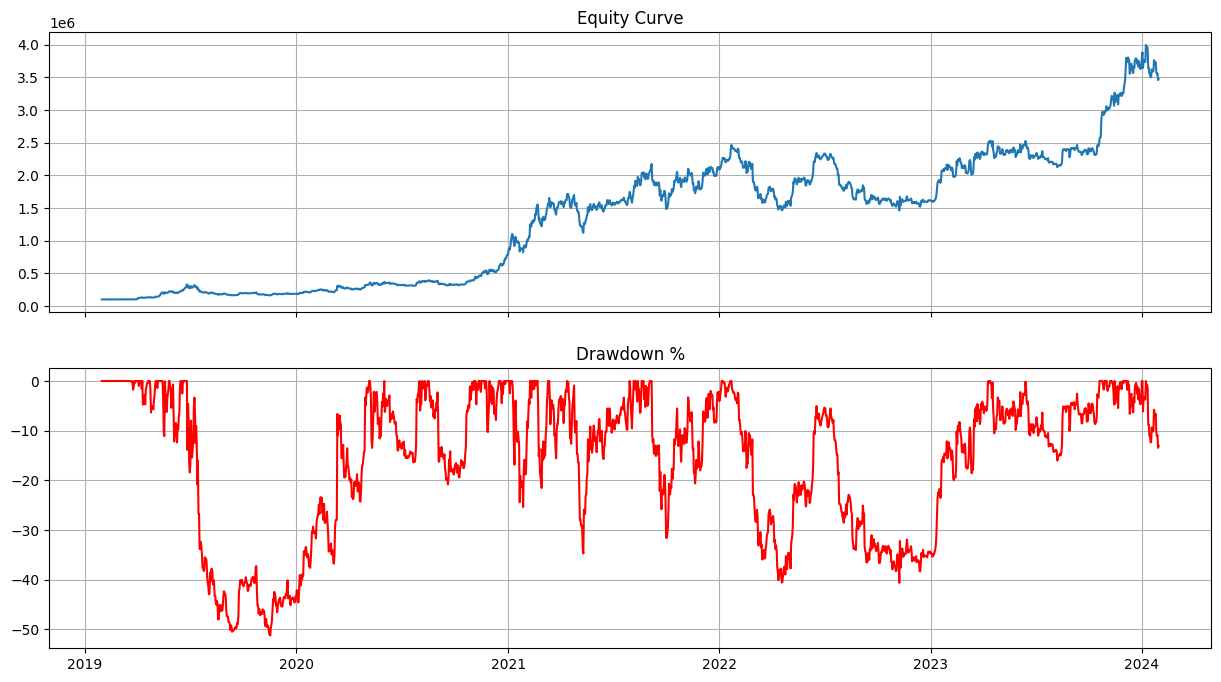

In [21]:
idea_1_SLTP_op = Backtest(df, BB_strategy_STLP_op, cash=100000, commission=0, trade_on_close=True)
stats_1_SLTP_op = idea_1_SLTP_op.run()

print("Buy and hold return (%): ", stats_1_SLTP_op['Buy & Hold Return [%]'])
print("Strategy return (%): ", stats_1_SLTP_op['Return [%]'])

# To see equity curve and max drawdown
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15, 8))
ax1.plot(stats_1_SLTP_op['_equity_curve']['Equity'])
ax1.set_title("Equity Curve")
ax1.grid(True)

ax2.plot(-100*stats_1_SLTP_op['_equity_curve']['DrawdownPct'], color = 'red')
ax2.set_title("Drawdown %")
ax2.grid(True)

plt.show()

## Final Words
In summary, this strategy optimization exercise demonstrated promising returns but requires further refinement before real-world implementation.

The optimizations significantly improved returns (3375%), even during bitcoin's downtrend, indicating the potential efficacy of this strategy. However, drawdowns remain quite high at current settings, making leverage usage inadvisable for now.

Additional testing is needed including accounting for price slippage and commissions. Assessing real-world performance will be critical before advancing this strategy.

While an incomplete result, this project established a foundation and identified avenues for further optimization. With rigorous ongoing verification, research, and caution, a refined version of this strategy could eventually merit consideration. However, this analysis alone should not be taken as investment advice, and I assume no financial responsibility for actions taken based on these findings